In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv('final_dataset.csv')
df.head()

STATION        Date  TIMEINT     ENTRIES  Clear  Fog  Haze  Heavy Rain  \
0    1 AV  2016-01-01        1  1407774726   0.00  0.0   0.0         0.0   
1    1 AV  2016-01-01        2  1407775796   0.00  0.0   0.0         0.0   
2    1 AV  2016-01-01        3  1407776768   0.00  0.0   0.0         0.0   
3    1 AV  2016-01-01        4  1407779799   0.00  0.0   0.0         0.0   
4    1 AV  2016-01-01        5  1407783611   0.75  0.0   0.0         0.0   

   Heavy Snow  Humidity     ...       Light Freezing Rain  Light Rain  \
0         0.0     53.50     ...                       0.0         0.0   
1         0.0     58.25     ...                       0.0         0.0   
2         0.0     53.50     ...                       0.0         0.0   
3         0.0     49.25     ...                       0.0         0.0   
4         0.0     48.50     ...                       0.0         0.0   

   Light Snow  Mostly Cloudy  Overcast  Partly Cloudy  Rain  Scattered Clouds  \
0         0.0            0.0      1.00           0.00   0.0               0.0   
1         0.0            0.0      1.00           0.00   0.0               0.0   
2         0.0            0.0      0.75           0.25   0.0               0.0   
3         0.0            0.0      1.00           0.00   0.0               0.0   
4         0.0            0.0      0.00           0.25   0.0               0.0   

   Snow  Temperature  
0   0.0       41.275  
1   0.0       39.450  
2   0.0       39.675  
3   0.0       39.450  
4   0.0       37.450  

[5 rows x 21 columns]

In [27]:
df['datetime'] = pd.to_datetime(df.Date)
df['datetime'] += pd.to_timedelta((df.TIMEINT - 1)*4, 'h')
df.set_index('datetime', inplace=True)
df.head()

STATION        Date  TIMEINT     ENTRIES  Clear  Humidity  \
datetime                                                                        
2016-01-01 00:00:00    1 AV  2016-01-01        1  1407774726   0.00     53.50   
2016-01-01 04:00:00    1 AV  2016-01-01        2  1407775796   0.00     58.25   
2016-01-01 08:00:00    1 AV  2016-01-01        3  1407776768   0.00     53.50   
2016-01-01 12:00:00    1 AV  2016-01-01        4  1407779799   0.00     49.25   
2016-01-01 16:00:00    1 AV  2016-01-01        5  1407783611   0.75     48.50   

                     Rain  Snow  Temperature  Cloudy  
datetime                                              
2016-01-01 00:00:00   0.0   0.0       41.275    1.00  
2016-01-01 04:00:00   0.0   0.0       39.450    1.00  
2016-01-01 08:00:00   0.0   0.0       39.675    1.00  
2016-01-01 12:00:00   0.0   0.0       39.450    1.00  
2016-01-01 16:00:00   0.0   0.0       37.450    0.25

In [15]:
nonconditions = ['Date', 'STATION', 'TIMEINT', 'ENTRIES', 'Temperature', 'Humidity']
conditions = df.drop(nonconditions, axis=1).columns
conditions

Index([u'Clear', u'Fog', u'Haze', u'Heavy Rain', u'Heavy Snow',
       u'Light Freezing Fog', u'Light Freezing Rain', u'Light Rain',
       u'Light Snow', u'Mostly Cloudy', u'Overcast', u'Partly Cloudy', u'Rain',
       u'Scattered Clouds', u'Snow', u'Cloudy'],
      dtype='object')

In [12]:
# Merge the weather conditions
df['Rain'] += df['Heavy Rain'] + df['Light Rain'] + df['Light Freezing Rain']
df['Snow'] += df['Heavy Snow'] + df['Light Snow']
df['Cloudy'] = (df['Partly Cloudy'] + df['Scattered Clouds'] + df['Mostly Cloudy']
                + df['Overcast'] + df['Fog'] + df['Haze'] + df['Light Freezing Fog'])

# Get rid of columns that we don't want
df = df.drop([c for c in conditions if c not in ['Rain', 'Snow', 'Cloudy', 'Clear']], axis=1)

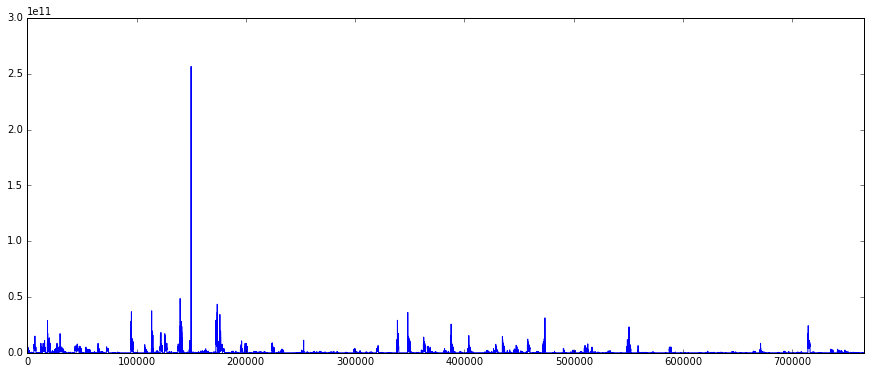

In [13]:
df['ENTRIES'].plot()

In [22]:
set(df.columns) - set(nonconditions)

{'Clear', 'Cloudy', 'Rain', 'Snow'}

In [23]:
df[list(set(df.columns) - set(nonconditions))].plot()

<IPython.core.display.Javascript object>

In [36]:
df = df.reset_index().set_index(['STATION', 'datetime'])
df.head()

Date  TIMEINT     ENTRIES  Clear  Humidity  \
STATION datetime                                                                
1 AV    2016-01-01 00:00:00  2016-01-01        1  1407774726   0.00     53.50   
        2016-01-01 04:00:00  2016-01-01        2  1407775796   0.00     58.25   
        2016-01-01 08:00:00  2016-01-01        3  1407776768   0.00     53.50   
        2016-01-01 12:00:00  2016-01-01        4  1407779799   0.00     49.25   
        2016-01-01 16:00:00  2016-01-01        5  1407783611   0.75     48.50   

                             Rain  Snow  Temperature  Cloudy  
STATION datetime                                              
1 AV    2016-01-01 00:00:00   0.0   0.0       41.275    1.00  
        2016-01-01 04:00:00   0.0   0.0       39.450    1.00  
        2016-01-01 08:00:00   0.0   0.0       39.675    1.00  
        2016-01-01 12:00:00   0.0   0.0       39.450    1.00  
        2016-01-01 16:00:00   0.0   0.0       37.450    0.25

In [ ]:
for level in df.index.get_level_values(0):
    df.loc[level]['ENTRIES'].plot()

In [ ]:
for week in df.groupby(pd.TimeGrouper('w')):